In [12]:
# Libraries that this notebook will use:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from datascience import *
from matplotlib.colors import ListedColormap
import re
# Helps the maps display nicely in the notebook:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]
# Tells the notebook not to display warnings:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

<img src="http://s3.amazonaws.com/holc/tiles/MN/Minneapolis/19XX/holc-scan.jpg" width="300"/>

# The Homeowner's Loan Corporation Survey (HOLC)
> The Mapping Inequality dataset on PolicyMap comprises of neighborhood risk assessment data for 148 cities across the US. The Federal Home Loan Bank Board (FHLBB), the HOLC’s parent organization, commissioned the City Survey Program in 1935 to collect data on real estate risk levels across 239 cities. As part of the exercise, each neighborhood was evaluated via a network of realtors, lenders, developers, and HOLC staff members, and ultimately assigned a rating or letter grade which signified the neighborhood’s investment prospects for lending. The rating was primarily a function of neighborhood racial and ethnic makeup, housing conditions, and access to public facilities, among other factors. Ratings assigned to neighborhoods included: “A-Best”, “B-Still Desirable”, “C-Definitely Declining”, and “D-Hazardous”.

> The HOLC maps were part of a broader landscape of housing and lending policies during the 1930s and 1940s, and it is worth noting that there is a strong body of literature suggesting that the HOLC maps were more a consequence of existing discriminatory lending practices, as opposed to being a cause for them. Other studies have also tried to empirically show how the HOLC grades were more a function of factors such as housing condition, residential density, and housing type, as opposed to solely ethnic and racial composition. Several scholars have conducted a deeper analysis of HOLC maps for specific regions such as Philadelphia,PA, Richmond,VA, and Hartford,CT, in order to explore local factors and players involved in neighborhood classification.

-- from [PolicyMap](https://www.policymap.com/2017/07/holc-historic-lending-guideline-maps-policymap/)

- A - "Best", green
- B - "Still Desirable", blue
- C - "Definitely Declining", yellow
- D - "Hazardous", red

Data and images are sourced from the [Mapping Inequality: Redlining in New Deal America Project](https://dsl.richmond.edu/panorama/redlining).

Now let's create the historical map of Minneapolis seen above with Geopandas.

First, read in the shapefiles to Geopandas to create a GeoDataframe. The shapefile folder is name is called `holc_minneapolis`.

In [19]:
# Read in shapefiles
minneapolis = gpd.read_file('holc_minneapolis')
# Preview dataframe
minneapolis.head()

,name,holc_id,holc_grade,area_descr,geometry
0,None,A1,A,"{ ""1"" : ""This is a newly developed district, a...",(POLYGON ((-93.26495588791659 44.9251021258190...
1,None,A10,A,"{ ""1"" : ""This is a development of the last ten...",POLYGON ((-93.31012469855496 44.96994097517342...
2,None,A11,A,"{ ""1"" : ""This area is located near the westerl...","POLYGON ((-93.3135269167766 44.99149341956696,..."
3,None,A12,A,"{ ""1"" : ""This small area is located on high la...","POLYGON ((-93.31592464603405 45.0015980730774,..."
4,None,A13,A,"{ ""1"" : ""This small area faces Memorial Drive....",POLYGON ((-93.31847685318101 45.02756583319863...


For our plotting purposes, we are interested in the `holc_grade` and `geometry` columns. The `holc_grade` column contains the A-B-C-D grade each area received during the HOLC survey, and the `geometry` column contain the POLYGON shapes that will allow us to plot the data geospatially.

Now let's plot using the `.plot()` function from Geopandas. Here we want to plot by `holc_grade`. Notice that when we plot by continuous values as in the previous notebook, Geopandas automatically plots using a continuous spectrum of colors. However, here, as the `holc_grade` values are categorical, Geopandas automatically assigns each of the four values with their own color.

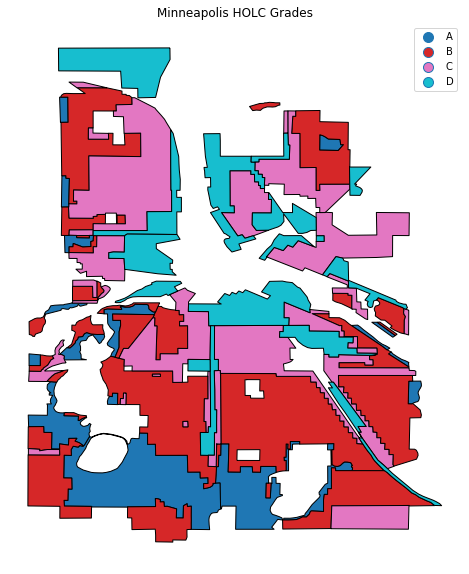

In [21]:
# Plot by holc_grade
minneapolis.plot(column = 'holc_grade', legend = True, figsize=[18, 10])
plt.title('Minneapolis HOLC Grades')
plt.axis('off');

What if we want our colors to match those of the historical map? To create a customized palette, we can create a new `ListedColormap` object. When we create the `ListedColormap` object, we pass in a list of the colors that we want to correspond to each of the A-B-C-D values. The colors in the list will automatically correspond to the grade values in alphabetical order. Then we pass the `ListedColormap` object into the `cmap` argument when we plot again.

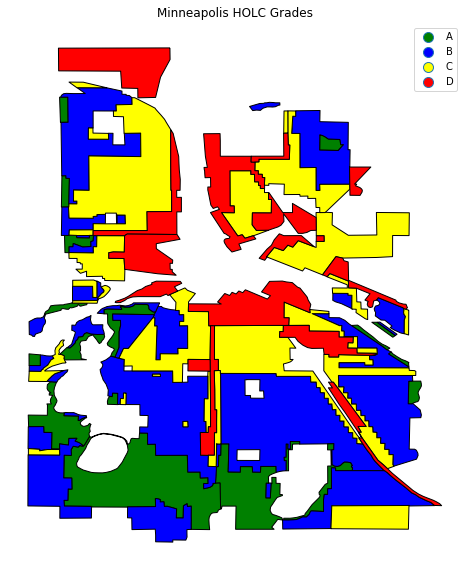

In [22]:
from matplotlib.colors import ListedColormap
# Create a ListedColormap object called holc_cmap, pass in the list of colors
holc_cmap = ListedColormap(['green', 'blue', 'yellow', 'red'], name='holc_colors')
# Plot again, passing holc_cmap into the cmap argument
minneapolis.plot(column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('Minneapolis HOLC Grades')
plt.axis('off');

While matching the colors with those of the historical map is cool, as responsible data scientists, we want to make sure that we plot using colors that everyone can see. This means accounting for colors that may not be seen as well by those with color-blindness, as well as making sure that each shade can still be distinct even in black & white (perceptual uniformity). There are several Matplotlib color palettes that are designed to meet those criteria, and you are encouraged to use them.

In [23]:
# Stuff with Matplotlib palettes
...

Now it's your turn to do your own investigation. Below is a Geodataframe that contains data on these California cities: Fresno, Los Angeles, Oakland, *Berkeley, Piedmont, Albany, San Leandro, Emeryville*, San Diego, San Jose, San Francisco, and Stockton. 

You can choose to plot one city or many at once, but if you choose to plot multiple, make sure that they are relatively close together. Additionally, if you choose to plot the italicized cities, plot them alongside Oakland.

To select certain cities, you will need to filter by the `area`column. In order to manipulate a GeoDataframe, you will need to use Pandas methods. Let's go over some Pandas filtering methods and compare them to their analogs in the datascience Tables library you are used to.

In [24]:
california = gpd.read_file('holc_ca')
california.head()

,name,holc_id,holc_grade,area_descr,area,geometry
0,None,A,A,"{ """" : """" }",Oakland,POLYGON ((-122.2025219245971 37.81098621368113...
1,None,A1,A,"{ ""1"" : ""Berkeley Green A-1"", ""10a"" : ""fair"", ...",Berkeley,"POLYGON ((-122.263194014919 37.9003948457167, ..."
2,None,A10,A,"{ ""1"" : ""Oakland, California Low Green A-10"", ...",Oakland,POLYGON ((-122.2340298202495 37.80670967378922...
3,None,A11,A,"{ ""1"" : ""Oakland, California Green A-11"", ""10a...",Oakland,POLYGON ((-122.2025219245971 37.81098621368113...
4,None,A2,A,"{ ""1"" : ""Berkeley, California Green A-2"", ""10a...",Berkeley,POLYGON ((-122.2784713548339 37.89710197965462...


In [ ]:
# To be continued
my_cities = california....